## Data Cleaning And Preparation

##### I'll be working on a telcom customer behavior and revenue trends.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [29]:
# 1. Load the dataset
df = pd.read_csv('Telcom-data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [30]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# 2. Data Cleaning
# TotalCharges is often read as an object/string because of blank spaces. 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
# Check for missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [34]:
# Handle missing values in TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [35]:
# Encode Categorical Variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [36]:
# Save cleaned dataset
df.to_csv('Cleaned_Telcom_data.csv', index=False)
print("\nCleaned dataset saved as 'Cleaned_Telcom_data.csv'")

# Summary Statistics
display(df.describe())


Cleaned dataset saved as 'Cleaned_Telcom_data.csv'


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Visualizing comparison of customer distributions, charges and correlations

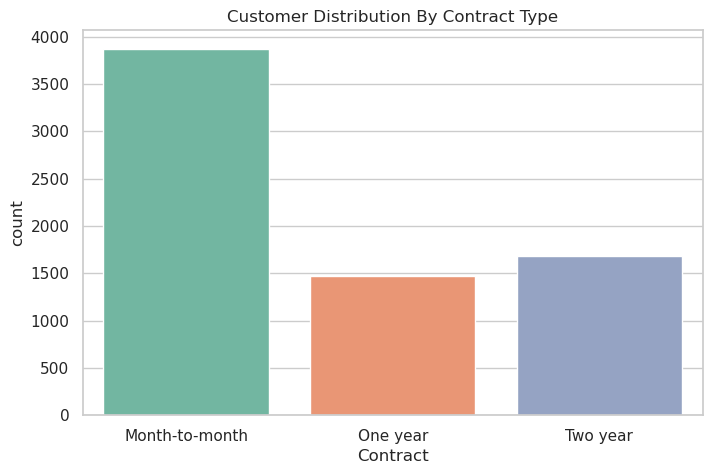

In [39]:
sns.set_theme(style="whitegrid")

# customer didtribution across Contract types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', palette='Set2')
plt.title('Customer Distribution By Contract Type')
plt.show()

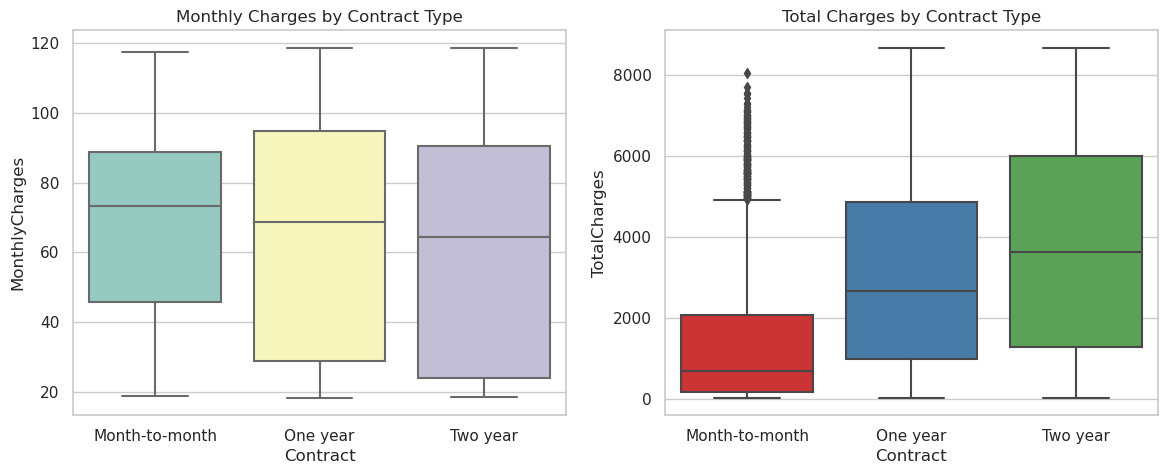

In [42]:
# Compare MonthlyCharges and Total Charges for different customer groups

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', ax=axes[0], palette='Set3')
axes[0].set_title('Monthly Charges by Contract Type')

sns.boxplot(data=df, x='Contract', y='TotalCharges', ax=axes[1], palette='Set1')
axes[1].set_title('Total Charges by Contract Type')
plt.show()

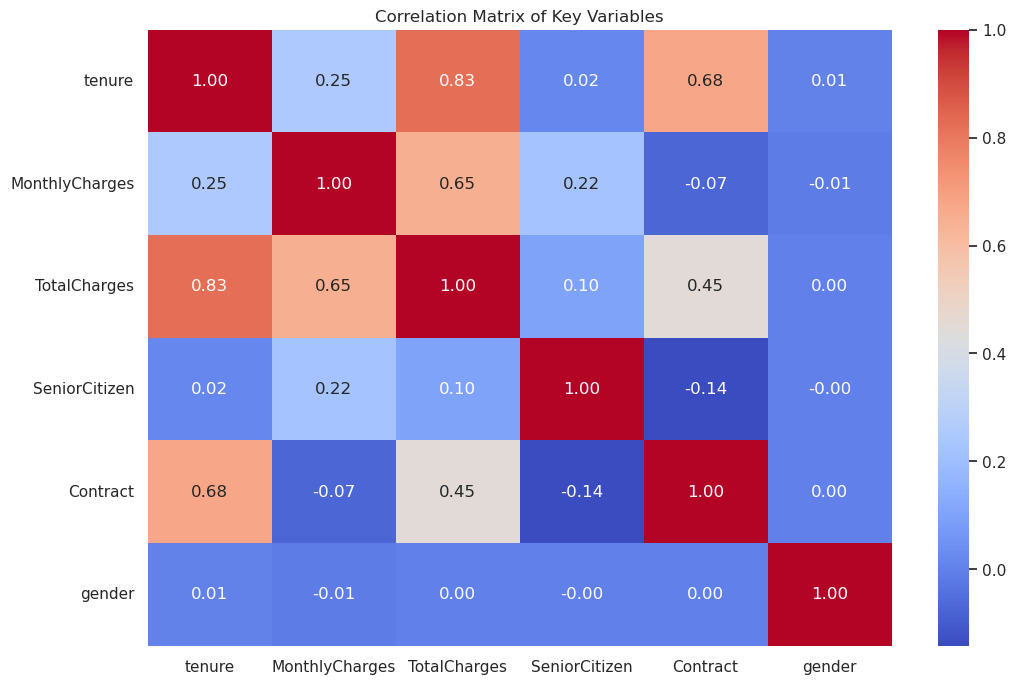

In [43]:
# Correlation Matrix

plt.figure(figsize=(12,8))
corr_matrix = df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Contract', 'gender']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')

plt.show()

### Hypothesis Testing

#### hypothesis 1: Do customers with long-term contracts have higher total spending?(Anova test would be more preferrable as there are more than 2 contract types)

#### hypothesis 2: (Indepedent t-test) To test for a significant diference in spending between male and female customers

In [44]:
# Hypothesis 1: TotalCharges across contract types

month_to_month = df[df['Contract'] == 'Month-to-month']['TotalCharges']
one_year = df[df['Contract'] == 'One year']['TotalCharges']
two_year = df[df['Contract'] == 'Two year']['TotalCharges']

f_stat, p_val_1 = stats.f_oneway(month_to_month, one_year, two_year)
print(f"Hypothesis 1 (ANOVA) - F-statistic: {f_stat:.2f}, p-value: {p_val_1:.4e}")
if p_val_1 < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in Total Charges among contract types.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.\n")

Hypothesis 1 (ANOVA) - F-statistic: 934.74, p-value: 0.0000e+00
Conclusion: Reject the null hypothesis. There is a significant difference in Total Charges among contract types.



In [45]:
# Hypothesis 2: MonthlyCharges betwen male and female

male_charges = df[df['gender'] == 'Male']['MonthlyCharges']
female_charges = df[df['gender'] == 'Female']['MonthlyCharges']

t_stat, p_val_2 = stats.ttest_ind(male_charges, female_charges, equal_var=False)
print(f"Hypothesis 2 (T-Test) - T-statistic: {t_stat:.2f}, p-value: {p_val_2:.4f}")
if p_val_2 < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in Monthly Charges between genders.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in Monthly Charges between genders.")

Hypothesis 2 (T-Test) - T-statistic: -1.16, p-value: 0.2479
Conclusion: Fail to reject the null hypothesis. No significant difference in Monthly Charges between genders.


### Regression Analysis

Linear Regression Results:
Coefficients: [  0.61870792 -15.84535777  -3.19273736]
Intercept: 60.70
Mean Squared Error (MSE): 728.84
R-squared (R2): 0.1753


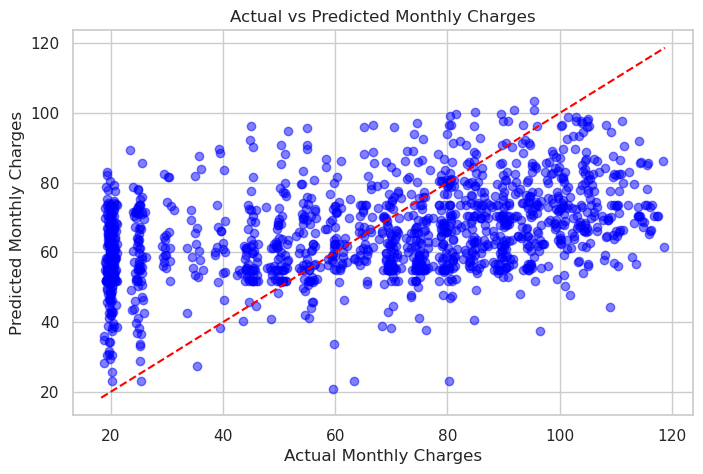

In [46]:
X = df_encoded[['tenure', 'Contract', 'PaymentMethod']]
y = df_encoded['MonthlyCharges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Monthly Charges")
plt.ylabel("Predicted Monthly Charges")
plt.title("Actual vs Predicted Monthly Charges")
plt.show()

##### Report on the Analysis
After analyzing the tel-com data, I have uncovered that:

i) Majority of the customer base is on "Month-to-month"contracts.These customers generate consistent short-term revenue however, they exhibit significantly lower lifetime value compared to customers on One-year or Two-year contracts.

ii)Customers on longer-term contracts tend to have more stable and predictable spending patterns.variables like Tenure and TotalCharges are highly correlated meaning that customer retention is the most critical driver of overall revenue.

iii)Results from hypothesis testing:
    Hypothesis 1 Findings;
Null Hypothesis: There is no difference in TotalCharges among the three contract types.
Alternative Hypothesis:Customers with longer Contracts have significantly higher TotalCharges.

 Test used:
One-way Anova: The null hypothesis we reject it as the test yielded a p-value strictly less than 0.005.There is a significant difference in total spending across contract types.Customers on Two-year contracts generate exponentially higher total revenue over their lifecycle compared to month-to-month users, largely due to accumulated tenure and lower churn risk.

    Hypothesis 2 findings;
Null Hypothesis: There is no difference in MonthlyCharges between male and female customers.
Alternative Hypothesis: males and females have different spending behaviors. 
 
 Test Used:
 Independent Two-sample T-test: The null hypothesis is not rejected as the test yielded a p-value greater than 0.05.This proves that gender does not play a significant role in determining a customer's monthly telecom bill.

 iv) 5. Recommendations for Business Decisions
Based on the analytical findings, the telecom company should implement the following data-driven strategies:

Incentivize Contract Upgrades: Since month-to-month customers represent a high-churn risk with lower total lifetime value, the company should offer targeted discounts or waived upgrade fees to month-to-month customers who agree to switch to a One-year or Two-year contract.

Promote Premium Services to High-Tenure Customers: The regression analysis shows that spending naturally increases with tenure. The business should proactively target customers who have been with the company for over 12-24 months with premium service promotions (e.g., discounted security packages or streaming bundles) to maximize their Monthly Charges.

Optimize Payment Methods: Customers using Electronic Checks often face higher monthly charges and are historically more prone to missing payments or churning. The company should offer a small monthly discount (e.g., $5 off) for customers who enroll in automatic Bank Transfers or Credit Card payments to secure guaranteed revenue.

Improve Senior Citizen Engagement: While gender does not affect spending, senior citizens often require different service structures. The company should improve customer support and offer simplified, accessible plans for senior citizens to enhance engagement and extend their tenure.
 